<a href="https://colab.research.google.com/github/mrigankoml/MLAP_Term-IV/blob/main/Logistic%20Regression/Exercise%20/HR_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Classification**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
hr_df = pd.read_csv( "https://raw.githubusercontent.com/kshtjrj83/MLAP_2021/main/Logistic%20Regression/Exercise/HR_comma_sep.csv" )
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hr_df.iloc[0:5,1:7]

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
0,0.53,2,157,3,0,1
1,0.86,5,262,6,0,1
2,0.88,7,272,4,0,1
3,0.87,5,223,5,0,1
4,0.52,2,159,3,0,1


In [ ]:
hr_df.iloc[0:5,7:]

,promotion_last_5years,Department,salary
0,0,sales,low
1,0,sales,medium
2,0,sales,medium
3,0,sales,low
4,0,sales,low


In [ ]:
hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
X_features = list(hr_df.columns)
X_features.remove('left')
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department',
 'salary']

**Encoding Categorical Features**

In [ ]:
encoded_hr_df = pd.get_dummies(hr_df[X_features],
drop_first = True )

In [ ]:
list(encoded_hr_df.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [ ]:
encoded_hr_df[['Department_RandD',
'Department_accounting',
'Department_hr','Department_management','Department_marketing','Department_product_mng','Department_sales','Department_support','Department_technical']].head(5)

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [ ]:
import statsmodels.api as sm
Y = hr_df.left
X = sm.add_constant(encoded_hr_df)

**Splitting into Train and Validation Sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 100)

**Building Logistic Regression Model**

In [ ]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.429431
         Iterations 7


**Printing Model Summary**

In [ ]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                 Logit              Pseudo R-squared:   0.213    
Dependent Variable:    left               AIC:                9055.1947
Date:                  2021-09-01 05:13   BIC:                9193.1163
No. Observations:      10499              Log-Likelihood:     -4508.6  
Df Model:              18                 LL-Null:            -5730.1  
Df Residuals:          10480              LLR p-value:        0.0000   
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                  -1.7921   0.2267  -7.9040 0.0000 -2.2365 -1.3477
satisfaction_level     -4.0199   0.1168 -34.4031 0.0000 -4.2490 -3.7909
last_evaluation         0.8254   0.1775   4.6493 0.0000  0.4774  1.1734
number_project         -0.3160   0.0255 -12.3773 0.0000 -0.3661 -0.2660
average_montly_hours    0.0045   0.0006   7.4702 0.0000  0.0034  0.0057
time_spend_company      0.2727   0.0187  14.6126 0.0000  0.2361  0.3093
Work_accident          -1.5349   0.1074 -14.2971 0.0000 -1.7453 -1.3245
promotion_last_5years  -1.5238   0.3091  -4.9304 0.0000 -2.1296 -0.9181
Department_RandD       -0.5101   0.1634  -3.1215 0.0018 -0.8304 -0.1898
Department_accounting   0.2067   0.1452   1.4233 0.1546 -0.0779  0.4914
Department_hr           0.4078   0.1433   2.8469 0.0044  0.1271  0.6886
Department_management  -0.3013   0.1806  -1.6683 0.0953 -0.6552  0.0527
Department_marketing    0.0820   0.1440   0.5697 0.5689 -0.2002  0.3643
Department_product_mng  0.0493   0.1431   0.3443 0.7306 -0.2311  0.3296
Department_sales        0.1260   0.1055   1.1946 0.2322 -0.0807  0.3328
Department_support      0.1561   0.1151   1.3560 0.1751 -0.0695  0.3816
Department_technical    0.2196   0.1110   1.9787 0.0478  0.0021  0.4371
salary_low              1.9416   0.1543  12.5836 0.0000  1.6392  2.2440
salary_medium           1.4106   0.1552   9.0885 0.0000  1.1064  1.7148
=======================================================================

"""

**Model Dignostics**

In [ ]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [ ]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_hr',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [ ]:
final_logit = sm.Logit( y_train,
sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.429927
         Iterations 7


In [ ]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.212    
Dependent Variable:   left               AIC:                9053.6070
Date:                 2021-09-01 05:14   BIC:                9147.9744
No. Observations:     10499              Log-Likelihood:     -4513.8  
Df Model:             12                 LL-Null:            -5730.1  
Df Residuals:         10486              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.7301   0.2076  -8.3334 0.0000 -2.1370 -1.3232
satisfaction_level    -4.0228   0.1168 -34.4542 0.0000 -4.2516 -3.7940
last_evaluation        0.8214   0.1774   4.6311 0.0000  0.4737  1.1690
number_project        -0.3159   0.0255 -12.3894 0.0000 -0.3659 -0.2659
average_montly_hours   0.0046   0.0006   7.4994 0.0000  0.0034  0.0058
time_spend_company     0.2681   0.0185  14.5091 0.0000  0.2319  0.3044
Work_accident         -1.5334   0.1073 -14.2936 0.0000 -1.7437 -1.3232
promotion_last_5years -1.5617   0.3080  -5.0702 0.0000 -2.1655 -0.9580
Department_RandD      -0.6055   0.1378  -4.3939 0.0000 -0.8756 -0.3354
Department_hr          0.3119   0.1132   2.7545 0.0059  0.0900  0.5339
Department_technical   0.1234   0.0679   1.8181 0.0690 -0.0096  0.2565
salary_low             1.9963   0.1533  13.0254 0.0000  1.6959  2.2966
salary_medium          1.4609   0.1543   9.4674 0.0000  1.1585  1.7634
======================================================================

"""

**Predicting on Test Data**

In [ ]:
y_pred_df = pd.DataFrame( { "actual": y_test,
"predicted_prob": final_logit.predict(
sm.add_constant( X_test[significant_vars] ) ) } )

In [ ]:
y_pred_df.sample(10, random_state = 100)

,actual,predicted_prob
7166,0,0.215294
7033,0,0.145796
8307,0,0.015819
9772,0,0.097537
4856,0,0.085064
9774,0,0.123402
6073,0,0.086603
2554,0,0.344500
11082,0,0.323456
6874,0,0.262043


In [ ]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 100)

,actual,predicted_prob,predicted
7166,0,0.215294,0
7033,0,0.145796,0
8307,0,0.015819,0
9772,0,0.097537,0
4856,0,0.085064,0
9774,0,0.123402,0
6073,0,0.086603,0
2554,0,0.344500,0
11082,0,0.323456,0
6874,0,0.262043,0


**Creating a Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [ ]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["Bad Employee", "Good Employee"] ,
                yticklabels = ["Bad Employee", "Good Employee"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

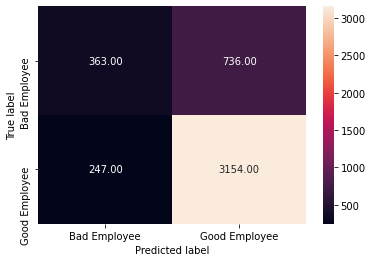

In [ ]:
draw_cm( y_pred_df.actual,
y_pred_df.predicted )

**Measuring Accuracies**

In [ ]:
print( metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3401
           1       0.60      0.33      0.42      1099

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


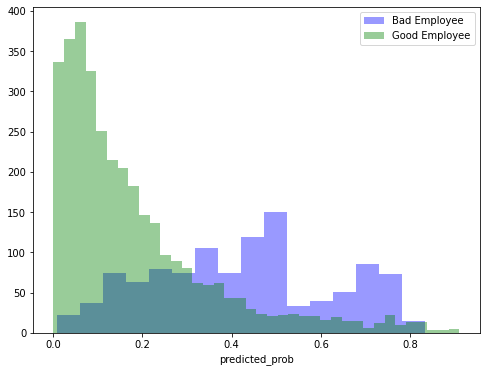

In [ ]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Bad Employee' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Good Employee' )
plt.legend()
plt.show()

**ROC & AUC**

In [ ]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

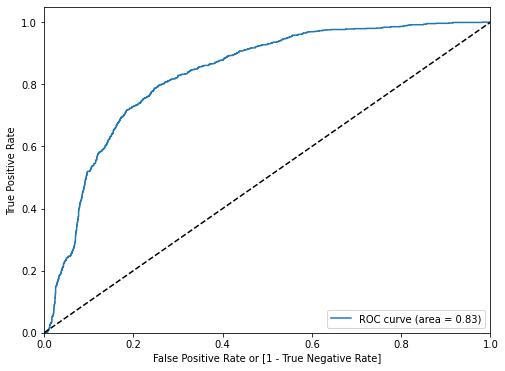

In [ ]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
y_pred_df.predicted_prob)

In [ ]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.83

**Finding Optimal Cutoff**
 
 Youden's index

In [ ]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,
                          'fpr': fpr,
                          'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
1540,0.795268,0.254925,0.238518,0.540343
1541,0.795268,0.255219,0.238358,0.540049
1510,0.787079,0.247280,0.241847,0.539799
1542,0.795268,0.255513,0.238216,0.539755
1555,0.797998,0.258453,0.236526,0.539545


In [ ]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
                                lambda x: 1 if x > 0.22 else 0)

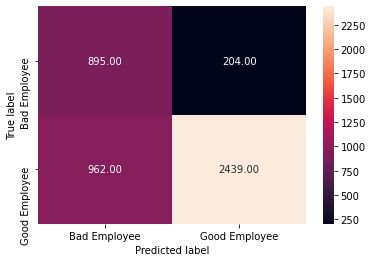

In [ ]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_new)

In [ ]:
print(metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      3401
           1       0.48      0.81      0.61      1099

    accuracy                           0.74      4500
   macro avg       0.70      0.77      0.71      4500
weighted avg       0.82      0.74      0.76      4500

